In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import time

In [ ]:
# Monte Carlo Simulation
def W_t(variance,N,s):
    np.random.seed(s)
    Z = np.sqrt(variance) * np.random.randn(N)
    return Z
def At(W):
    return (W**2 + np.sin(W))
def Bt(W,t):
    return (np.exp(t/2) * np.cos(W))

In [ ]:
N = 10_000
W_1 = W_t(1,N,123)
W_3 = W_t(3,N,123)
W_5 = W_t(5,N,123)
A1 = At(W_1).mean()
A3 = At(W_3).mean()
A5 = At(W_5).mean()

B1 = Bt(W_1,1).mean()
B3 = Bt(W_3,3).mean()
B5 = Bt(W_5,5).mean()

print('Value of A(t):',round(A1,5),round(A3,5),round(A5,5))
print('Value of B(t):',round(B1,5),round(B3,5),round(B5,5))

In [ ]:
# Call put value of GBM underlying using Monte Carlo Simulation
def MC_Option(S0,K,T,t,sigma,r,y,N,type,control=False):
    z = np.random.randn(N)
    mu_Q = r-y-(sigma**2)/2
    # Anthithetic Variates method Control vairante
    St = S0 * np.exp(mu_Q*(T-t)+sigma*np.sqrt(T-t)*z)
    St_n = S0 * np.exp(mu_Q*(T-t)-sigma*np.sqrt(T-t)*z)
    if type == 'call':
        payoff = np.maximum(St - K, 0)
        payoff_c = np.maximum(St_n - K, 0)
    elif type == 'put':
        payoff = np.maximum(K - St, 0)
        payoff_c = np.maximum(K - St_n, 0)
    if control == True:
        payoff = (payoff + payoff_c)/2
    result = np.exp(-r*(T-t))*np.mean(payoff)
    return result
MC_Option(S0=100,K=100,T=5,t=0,sigma=0.2,r=0.055,y=0,N=10_000,type='call')


In [ ]:
def BSM(S0,K,T,t,sigma,r,y,type):
    phi = -1
    if type == "call":
        phi = 1
    z_p = (np.log(S0/K) + (r-y)*(T-t))/(sigma * np.sqrt(T-t)) + (sigma * np.sqrt(T-t))/2
    z_n = (np.log(S0/K) + (r-y)*(T-t))/(sigma * np.sqrt(T-t)) - (sigma * np.sqrt(T-t))/2    
    
    price = phi *(S0 * np.exp(-y * (T-t))* norm.cdf(phi * z_p) - K * np.exp(-r * (T-t)) *norm.cdf(phi * z_n))
    return price
BSM(S0=100,K=100,T=5,t=0,sigma=0.2,r=0.055,y=0,type='call')

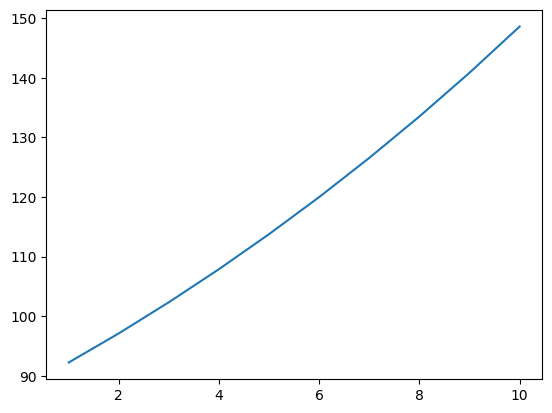

In [38]:
# simulate S without path
def simulate_S(S0,r,sigma,N,T,t):
    # np.random.seed(123)
    mu_Q = r-(sigma**2)/2
    z = np.random.randn(N)
    S = S0 * np.exp(mu_Q*(T-t)+sigma*np.sqrt(T-t)*z)
    return S
S_1 = pd.DataFrame(index = np.arange(1000), columns = np.arange(1,11))
for i in S_1.columns:
    S_1[i] = simulate_S(S0 = 88, r = 0.055, sigma = 0.2, T=i,t=0,N=1000)
plt.plot(S_1.mean(axis = 0))  


In [70]:
# Simulate S with Path
def Sim_Sp(S0, t, T, r, sigma, N):
    dt = T/N
    S = [S0]
    z = np.cumsum(np.random.randn(N) * np.sqrt(dt))
    #S.append(S0 * np.exp(sigma * z[0] + (2 - sigma**2/2)*dt))
    for i in range(N):
        S.append(S0 * np.exp(sigma * z[i] + (2 - sigma**2/2)*dt))
    return S

In [5]:
def full_truncation_stock(S0, V0, rho, T, alpha, beta, gamma, r, M):
    N = 1_000
    dt = T/M
    S = np.zeros((N,M+1))
    V = np.zeros((N,M+1))
    # Reflection 
    S[:,0] = S0
    V[:,0] = V0 
    for i in range(1,M+1):
        np.random.seed(i)
        z1 = np.random.randn(N)
        z2 = np.random.randn(N)
        dW1 = np.sqrt(dt) * z1
        dW2 = np.sqrt(dt) * (rho * z1 + np.sqrt(1 - rho**2) * z2)
        S[:, i] = S[:,i-1] * (1 + r * dt + np.sqrt(np.maximum(0, V[:,i-1])) * dW1)
        V[:, i] = V[:,i-1] + (alpha + beta * np.maximum(0, V[:,i-1])) * dt + gamma * np.sqrt(np.maximum(0, V[:,i-1])) * dW2 
    return S.mean(axis = 0)

array([20.        , 20.0309054 , 20.08628365, 20.13451551, 20.17988682,
       20.195032  , 20.23154712, 20.24420071, 20.28263945, 20.32370042,
       20.296647  , 20.31634951, 20.33890896, 20.35034398, 20.36602491,
       20.39974567, 20.401945  , 20.42943816, 20.39936437, 20.40703662,
       20.42439127, 20.48469143, 20.52506522, 20.55353666, 20.57067503,
       20.5568619 , 20.56262795, 20.58143707, 20.62360174, 20.66128535,
       20.67764258, 20.75480419, 20.70732264, 20.70187238, 20.77568966,
       20.78791401, 20.83220233, 20.86561053, 20.85923442, 20.90733148,
       20.91729753, 20.89563612, 20.95574171, 21.00669073, 21.01086398,
       21.00055489, 21.03082027, 21.0593096 , 21.04901087, 21.07024639,
       21.09473793, 21.10529663, 21.07795848, 21.07128061, 21.12017717,
       21.10054844, 21.05533269, 21.0876558 , 21.09617545, 21.11139441,
       21.13221429, 21.157043  , 21.17086912, 21.2010833 , 21.24576518,
       21.3039484 , 21.32610941, 21.39538236, 21.41954369, 21.48